In [1]:
#DATASET FOR CLASSIFYING INTO BENIGN AND MALICIOUS TRAFFIC
from google.colab import files
uploaded = files.upload()

Saving merge_second_layer.csv to merge_second_layer.csv


In [2]:
import io
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
d=pd.read_csv(io.BytesIO(uploaded['merge_second_layer.csv']))
d.head(5)

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,PacketLengthSkewFromMode,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.191,176.103.130.131,50749,443,14-01-2020 15:49,95.081550,62311,655.342703,65358,687.388878,7474.676771,86.456213,135.673751,102.0,54,1.168467,0.944683,0.637236,670.585814,25.895672,45.065277,48.811292,1.495060,-0.433974,1.682529,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,Benign
1,192.168.20.191,176.103.130.131,50749,443,14-01-2020 15:50,122.309318,93828,767.136973,101232,827.672018,10458.118600,102.264943,141.245474,114.0,54,0.799261,0.853132,0.724023,708.465878,26.617022,52.287903,48.830314,31.719656,0.389704,0.772748,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,Benign
2,192.168.20.191,176.103.130.131,50749,443,14-01-2020 15:52,120.958413,38784,320.639127,38236,316.108645,7300.293933,85.441758,133.715278,89.0,54,1.570027,0.932978,0.638983,1358.911235,36.863413,50.316114,39.770747,0.417528,0.858198,1.353607,0.732636,0.000785,0.028021,0.029238,0.026921,0.026855,0.248064,0.085061,0.958348,Benign
3,192.168.20.205,9.9.9.11,50224,443,30-03-2020 19:23,127.502031,952325,7469.096708,1334141,10463.684300,21708.416130,147.337762,178.769820,165.0,165,0.280373,0.093458,0.824176,1036.272948,32.191194,53.237060,50.896862,0.000000,0.218091,1.653777,0.604676,0.001299,0.036046,0.012407,0.007977,0.000023,0.368722,0.343570,2.905219,Malicious
4,192.168.20.205,9.9.9.11,50230,443,30-03-2020 19:24,36.109819,17234,477.266308,28476,788.594371,19924.290610,141.153429,157.620690,165.0,68,-0.156836,0.634917,0.895526,27.878373,5.279997,3.037201,2.048706,0.000000,0.561645,0.575228,1.738442,0.014743,0.121423,0.034108,0.015330,0.000341,0.463939,0.278091,3.559992,Malicious


In [3]:
d=d.dropna(axis=1, how='all')

In [4]:
#NUMERICAL ENCODING
d["SourceIP"] = d["SourceIP"].astype('category')
d["SourceIP"] = d["SourceIP"].cat.codes
d["DestinationIP"] = d["DestinationIP"].astype('category')
d["DestinationIP"] = d["DestinationIP"].cat.codes
d["TimeStamp"] = d["TimeStamp"].astype('category')
d["TimeStamp"] = d["TimeStamp"].cat.codes
d["Label"] = d["Label"].astype('category')
d["Label"] = d["Label"].cat.codes
d.head(5)

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,PacketLengthSkewFromMode,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,2,1,50749,443,6,95.081550,62311,655.342703,65358,687.388878,7474.676771,86.456213,135.673751,102.0,54,1.168467,0.944683,0.637236,670.585814,25.895672,45.065277,48.811292,1.495060,-0.433974,1.682529,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,0
1,2,1,50749,443,7,122.309318,93828,767.136973,101232,827.672018,10458.118600,102.264943,141.245474,114.0,54,0.799261,0.853132,0.724023,708.465878,26.617022,52.287903,48.830314,31.719656,0.389704,0.772748,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,0
2,2,1,50749,443,8,120.958413,38784,320.639127,38236,316.108645,7300.293933,85.441758,133.715278,89.0,54,1.570027,0.932978,0.638983,1358.911235,36.863413,50.316114,39.770747,0.417528,0.858198,1.353607,0.732636,0.000785,0.028021,0.029238,0.026921,0.026855,0.248064,0.085061,0.958348,0
3,3,5,50224,443,29,127.502031,952325,7469.096708,1334141,10463.684300,21708.416130,147.337762,178.769820,165.0,165,0.280373,0.093458,0.824176,1036.272948,32.191194,53.237060,50.896862,0.000000,0.218091,1.653777,0.604676,0.001299,0.036046,0.012407,0.007977,0.000023,0.368722,0.343570,2.905219,1
4,3,5,50230,443,30,36.109819,17234,477.266308,28476,788.594371,19924.290610,141.153429,157.620690,165.0,68,-0.156836,0.634917,0.895526,27.878373,5.279997,3.037201,2.048706,0.000000,0.561645,0.575228,1.738442,0.014743,0.121423,0.034108,0.015330,0.000341,0.463939,0.278091,3.559992,1


In [5]:
#SPLITTING DATASET INTO INDEPENDENT AND DEPENDENT VARIABLES
np.set_printoptions(suppress=True)
X=d.iloc[:,:-1].values
Y=d.iloc[:,-1].values

#SPLITTING DATASET INTO TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.3)
X_test[0]

array([     3.        ,      5.        ,  50220.        ,    443.        ,
           28.        ,     33.943987  ,   1874.        ,     55.20859998,
         4963.        ,    146.211463  , 123398.5381    ,    351.2812806 ,
          213.65625   ,     76.        ,     68.        ,      1.17560705,
            0.41464279,      1.64414231,    178.1050495 ,     13.34560038,
            7.82596894,      0.068792  ,      0.        ,      1.7437605 ,
            0.58640816,      1.70529688,      0.00007683,      0.00876508,
            0.0102344 ,      0.015168  ,      0.000021  ,     -1.68860896,
            1.16523693,      0.85643363])

In [6]:
d = d.fillna(d.mean())

In [7]:
ACCURACY_SCORE={}

In [8]:
#Information gain 
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion="entropy")
y_pred_IG=clf_gini.fit(X_train,y_train).predict(X_test)
print(y_pred_IG)

[1 1 0 1 0 1 0 0 0 1 0 1 0 0 0]


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred_IG))
print(accuracy_score(y_test,y_pred_IG)*100)
print(classification_report(y_test,y_pred_IG))

[[8 0]
 [1 6]]
93.33333333333333
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [10]:
ACCURACY_SCORE['INFORMATION GAIN']=accuracy_score(y_test,y_pred_IG)*100

In [11]:
#GINI INDEX
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion="gini")
y_pred_GINI=clf_gini.fit(X_train,y_train).predict(X_test)
print(y_pred_GINI)

[1 1 0 1 0 1 0 0 1 1 0 1 0 0 0]


In [12]:
print(confusion_matrix(y_test,y_pred_GINI))
print(accuracy_score(y_test,y_pred_GINI)*100)
print(classification_report(y_test,y_pred_GINI))

[[7 1]
 [1 6]]
86.66666666666667
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.86      0.86      0.86         7

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15



[Text(200.88000000000002, 181.2, 'X[1] <= 2.5\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(133.92000000000002, 108.72, 'X[30] <= 0.0\ngini = 0.074\nsamples = 26\nvalue = [25, 1]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]')]

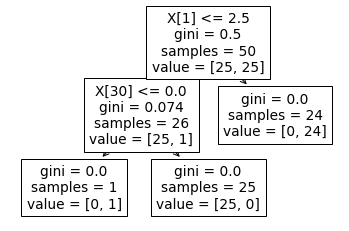

In [13]:
from sklearn import tree
tr=tree.DecisionTreeClassifier()
tr.fit(X,Y)
tree.plot_tree(tr)

In [14]:
ACCURACY_SCORE['GINI INDEX']=accuracy_score(y_test,y_pred_GINI)*100

In [15]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=2)
clf.fit(X_train,y_train)
y_pred_RF=clf.predict(X_test)
print(y_pred_RF)

[1 1 0 1 0 1 0 0 0 1 1 1 0 0 0]


In [16]:
y_pred_cat=[]
for x in y_pred_RF:
  if x==0:
    y_pred_cat.append("Benign")
  else :
    y_pred_cat.append("Malicious")
y_pred_cat

['Malicious',
 'Malicious',
 'Benign',
 'Malicious',
 'Benign',
 'Malicious',
 'Benign',
 'Benign',
 'Benign',
 'Malicious',
 'Malicious',
 'Malicious',
 'Benign',
 'Benign',
 'Benign']

In [17]:
print(confusion_matrix(y_test,y_pred_RF))
print(accuracy_score(y_test,y_pred_RF)*100)
print(classification_report(y_test,y_pred_RF))

[[8 0]
 [0 7]]
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [18]:
ACCURACY_SCORE['Random Forest']=accuracy_score(y_test,y_pred_RF)*100

In [19]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
y_pred_NB=gnb.fit(X_train,y_train).predict(X_test)
print(y_pred_NB)

[1 1 0 1 0 1 0 0 0 1 1 0 0 0 0]


In [20]:
print(confusion_matrix(y_test,y_pred_NB))
print(accuracy_score(y_test,y_pred_NB)*100)
print(classification_report(y_test,y_pred_NB))

[[8 0]
 [1 6]]
93.33333333333333
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [21]:
ACCURACY_SCORE['Naive bayes']=accuracy_score(y_test,y_pred_NB)*100

In [22]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=3)
y_pred_KNN=knn.fit(X_train,y_train).predict(X_test)
print(y_pred_KNN)

[1 0 0 1 0 1 0 0 1 1 0 1 0 0 0]


In [23]:
print(confusion_matrix(y_test,y_pred_KNN))
print(accuracy_score(y_test,y_pred_KNN)*100)
print(classification_report(y_test,y_pred_KNN))

[[7 1]
 [2 5]]
80.0
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.83      0.71      0.77         7

    accuracy                           0.80        15
   macro avg       0.81      0.79      0.80        15
weighted avg       0.80      0.80      0.80        15



In [24]:
ACCURACY_SCORE['KNN']=accuracy_score(y_test,y_pred_KNN)*100

In [25]:
#GRADIENT BOOST
from sklearn.ensemble import GradientBoostingClassifier
lr_rate= 0.5
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=lr_rate, random_state=0)
gb_clf.fit(X_train, y_train)
y_pred_GB=gb_clf.predict(X_test)
print(y_pred_GB)

[1 1 0 1 0 1 0 0 0 1 0 1 0 0 0]


In [26]:
print(confusion_matrix(y_test,y_pred_GB))
print(accuracy_score(y_test,y_pred_GB)*100)
print(classification_report(y_test,y_pred_GB))

[[8 0]
 [1 6]]
93.33333333333333
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [27]:
ACCURACY_SCORE['GRADIENT BOOST']=accuracy_score(y_test,y_pred_GB)*100
print(ACCURACY_SCORE)

{'INFORMATION GAIN': 93.33333333333333, 'GINI INDEX': 86.66666666666667, 'Random Forest': 100.0, 'Naive bayes': 93.33333333333333, 'KNN': 80.0, 'GRADIENT BOOST': 93.33333333333333}
